# HSV colorspace

### Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in RGB image

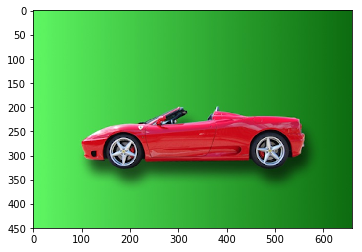

In [2]:
# Read in the image
image = cv2.imread('images/car_green_screen.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### RGB threshold 

Visualize the green threshold you defined in the previous, consistent green color case.

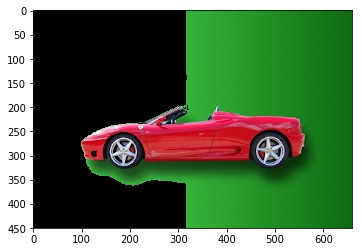

In [3]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### Visualize the car in HSV Color space

[[61 61 61 ... 61 61 61]
 [61 61 61 ... 61 61 61]
 [61 61 61 ... 61 61 61]
 ...
 [61 61 61 ... 61 61 61]
 [61 61 61 ... 61 61 61]
 [61 61 61 ... 61 61 61]]


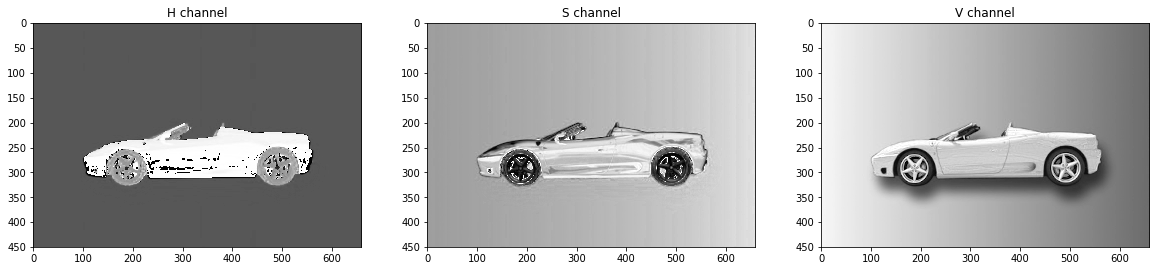

In [4]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

print(h)

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

### Mask the green area using HSV color space

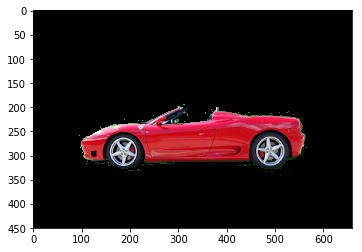

In [6]:
# Define our color selection boundaries in HSV values

# Define initial thresholds. These allows a certain low range for Hue (H)
lower_hue = np.array([60,50,50]) 
upper_hue = np.array([70,240,255])

# Define the masked area
mask = cv2.inRange(hsv, lower_hue, upper_hue)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image, cmap='gray')